In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import scipy
from sklearn import preprocessing
import tensorflow as tf
from numpy.fft import *

import os
from os import listdir
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from verta.integrations.keras import VertaCallback

#import os
#os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [5]:
path_Fifth_sticker= '../../First Dataset collected on 3 December 2020/Data_to_be_process/Fifth_Sticker'

# Importing Modes for Fifth Sticker

- IQ data are raw time series directly exported from SignalVU

In [6]:
Sticker_BackgroundRFactivities = pd.read_csv(path_Fifth_sticker+'/BackgroundRFactivities.csv')
Sticker_Connected = pd.read_csv(path_Fifth_sticker+'/Connected.csv')
Sticker_Searching = pd.read_csv(path_Fifth_sticker+'/Searching.csv')
Sticker_Searching_without_connected = pd.read_csv(path_Fifth_sticker+'/Searching_without_connecting_to_app.csv')

### Example of  how one mode of I Q Samples looks like [ Connected ]


In [7]:
Sticker_Connected

,Version,0.3
0,0.000031,-2.147000e-05
1,0.000008,4.120000e-05
2,0.000046,6.829000e-05
3,-0.000021,-3.300000e-07
4,-0.000050,5.250000e-06
...,...,...
3386995,0.000445,5.528500e-04
3386996,0.000317,5.385100e-04
3386997,0.000169,3.497200e-04
3386998,0.000211,1.295400e-04


In [7]:
# Renaming the Title of each coloum 

Sticker_BackgroundRFactivities=Sticker_BackgroundRFactivities.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})
Sticker_Connected=Sticker_Connected.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})
Sticker_Searching=Sticker_Searching.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})
Sticker_Searching_without_connected=Sticker_Searching_without_connected.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})


In [8]:
Sticker_Connected

,I_Data,Q_Data
0,0.000031,-2.147000e-05
1,0.000008,4.120000e-05
2,0.000046,6.829000e-05
3,-0.000021,-3.300000e-07
4,-0.000050,5.250000e-06
...,...,...
3386995,0.000445,5.528500e-04
3386996,0.000317,5.385100e-04
3386997,0.000169,3.497200e-04
3386998,0.000211,1.295400e-04


In [9]:
# converting Pandas to Numpy for easier plotting
Sticker_BackgroundRFactivities_numpy = Sticker_BackgroundRFactivities.to_numpy()
Sticker_Connected_numpy = Sticker_Connected.to_numpy()
Sticker_Searching_numpy = Sticker_Searching.to_numpy()
Sticker_Searching_without_connected_numpy = Sticker_Searching_without_connected.to_numpy()

## FFT BackGround RF Activities [ Fifth Sticker ]

- Without Absolute Intensity Background RF activities

/mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


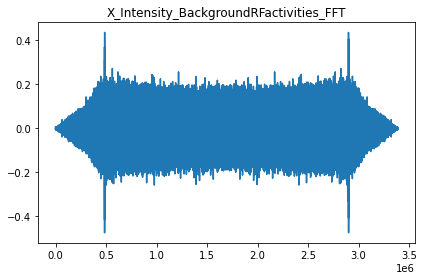

In [10]:
# Index 0 : I Data
# Index 1 : Q Data 

I_Data_BackgroundRFactivities_FFT = Sticker_BackgroundRFactivities_numpy[0:,0]
Q_Data_BackgroundRFactivities_FFT = Sticker_BackgroundRFactivities_numpy[0:,1]


X_Intensity_BackgroundRFactivities_FFT = np.fft.fftshift(fft(I_Data_BackgroundRFactivities_FFT[:]-np.mean(I_Data_BackgroundRFactivities_FFT[:])))
plt.plot(X_Intensity_BackgroundRFactivities_FFT)
plt.title("X_Intensity_BackgroundRFactivities_FFT")
plt.tight_layout()
plt.show()

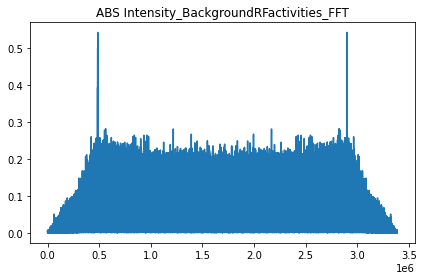

In [11]:
X_Intensity_BackgroundRFactivities_FFT_ABS = abs(np.fft.fftshift(fft(I_Data_BackgroundRFactivities_FFT[:]-np.mean(I_Data_BackgroundRFactivities_FFT[:]))))
plt.plot(X_Intensity_BackgroundRFactivities_FFT_ABS)
plt.title("ABS Intensity_BackgroundRFactivities_FFT")
plt.tight_layout()
plt.show()

- Without Absolute Quadrature Background RF activities

/mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


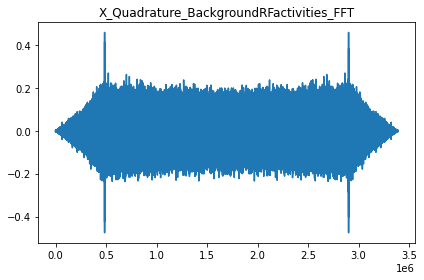

In [12]:
X_Quadrature_BackgroundRFactivities_FFT = np.fft.fftshift(fft(Q_Data_BackgroundRFactivities_FFT[:]-np.mean(Q_Data_BackgroundRFactivities_FFT[:])))
plt.plot(X_Quadrature_BackgroundRFactivities_FFT)
plt.title("X_Quadrature_BackgroundRFactivities_FFT")
plt.tight_layout()
plt.show()

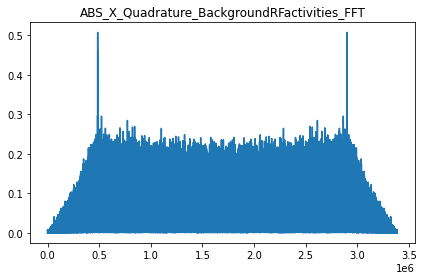

In [13]:
X_Quadrature_BackgroundRFactivities_FFT_ABS = abs(np.fft.fftshift(fft(Q_Data_BackgroundRFactivities_FFT[:]-np.mean(Q_Data_BackgroundRFactivities_FFT[:]))))
plt.plot(X_Quadrature_BackgroundRFactivities_FFT_ABS)
plt.title("ABS_X_Quadrature_BackgroundRFactivities_FFT")
plt.tight_layout()
plt.show()

# FFT Connected [ Fifth Sticker ]

/mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


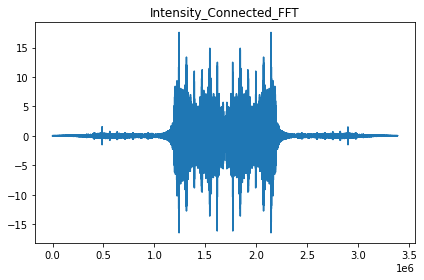

In [14]:
I_Data_Connected_FFT = Sticker_Connected_numpy[0:,0]
Q_Data_Connected_FFT = Sticker_Connected_numpy[0:,1]


X_Intensity_FFT_Connected = np.fft.fftshift(fft(I_Data_Connected_FFT[:]-np.mean(I_Data_Connected_FFT[:])))
plt.plot(X_Intensity_FFT_Connected )
plt.title("Intensity_Connected_FFT")
plt.tight_layout()
plt.show()

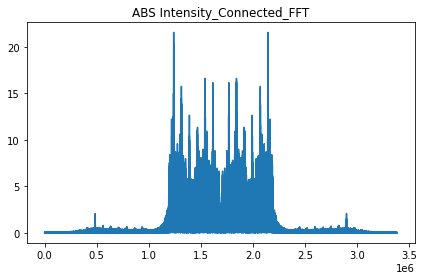

In [15]:

X_Intensity_FFT_Connected_ABS = abs(np.fft.fftshift(fft(I_Data_Connected_FFT[:]-np.mean(I_Data_Connected_FFT[:]))))
plt.plot(X_Intensity_FFT_Connected_ABS )
plt.title("ABS Intensity_Connected_FFT")
plt.tight_layout()
plt.show()

/mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


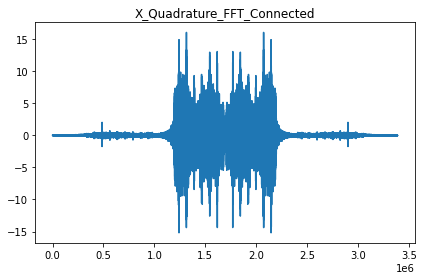

In [16]:
X_Quadrature_FFT_Connected = np.fft.fftshift(fft(Q_Data_Connected_FFT[:]-np.mean(Q_Data_Connected_FFT[:])))
plt.plot(X_Quadrature_FFT_Connected )
plt.title("X_Quadrature_FFT_Connected")
plt.tight_layout()
plt.show()

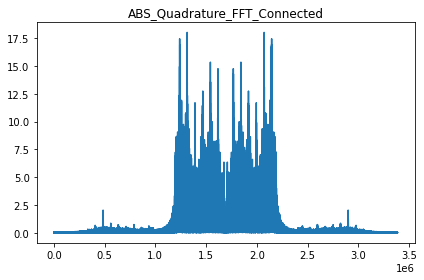

In [17]:
X_Quadrature_FFT_Connected_ABS = abs(np.fft.fftshift(fft(Q_Data_Connected_FFT[:]-np.mean(Q_Data_Connected_FFT[:]))))
plt.plot(X_Quadrature_FFT_Connected_ABS )
plt.title("ABS_Quadrature_FFT_Connected")
plt.tight_layout()
plt.show()

# FFT Searching [ Third sticker ]

/mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


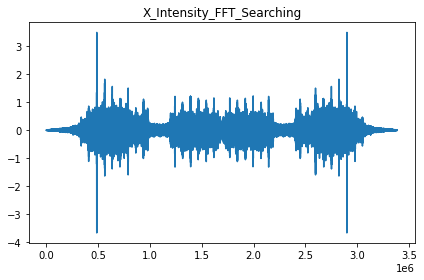

In [18]:
I_Data_Searching_FFT = Sticker_Searching_numpy[0:,0]
Q_Data_Searching_FFT = Sticker_Searching_numpy[0:,1]


X_Intensity_FFT_Searching = np.fft.fftshift(fft(I_Data_Searching_FFT[:]-np.mean(I_Data_Searching_FFT[:])))
plt.plot(X_Intensity_FFT_Searching )
plt.title("X_Intensity_FFT_Searching")
plt.tight_layout()
plt.show()

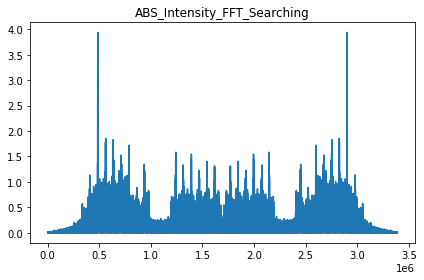

In [19]:

X_Intensity_FFT_Searching_ABS = abs(np.fft.fftshift(fft(I_Data_Searching_FFT[:]-np.mean(I_Data_Searching_FFT[:]))))
plt.plot(X_Intensity_FFT_Searching_ABS )
plt.title("ABS_Intensity_FFT_Searching")
plt.tight_layout()
plt.show()

/mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


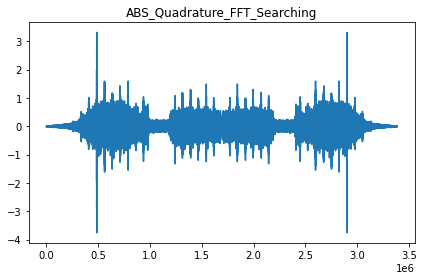

In [20]:
X_Quadrature_FFT_Searching = np.fft.fftshift(fft(Q_Data_Searching_FFT[:]-np.mean(Q_Data_Searching_FFT[:])))
plt.plot(X_Quadrature_FFT_Searching)
plt.title("ABS_Quadrature_FFT_Searching")
plt.tight_layout()
plt.show()

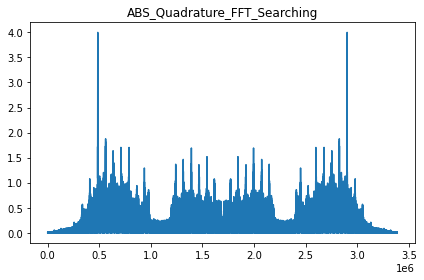

In [21]:
X_Quadrature_FFT_Searching_ABS = abs(np.fft.fftshift(fft(Q_Data_Searching_FFT[:]-np.mean(Q_Data_Searching_FFT[:]))))
plt.plot(X_Quadrature_FFT_Searching_ABS )
plt.title("ABS_Quadrature_FFT_Searching")
plt.tight_layout()
plt.show()

# Searching with WIFI established [ Third Sticker ] 

/mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


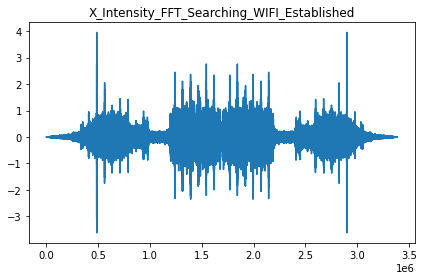

In [22]:
I_Data_Searching_WIFI_established_FFT = Sticker_Searching_without_connected_numpy[0:,0]
Q_Data_Searching_WIFI_established_FFT = Sticker_Searching_without_connected_numpy[0:,1]

X_Intensity_FFT_Searching_WIFI_established = np.fft.fftshift(fft(I_Data_Searching_WIFI_established_FFT[:]-np.mean(I_Data_Searching_WIFI_established_FFT[:])))
plt.plot(X_Intensity_FFT_Searching_WIFI_established )
plt.title("X_Intensity_FFT_Searching_WIFI_Established")
plt.tight_layout()
plt.show()

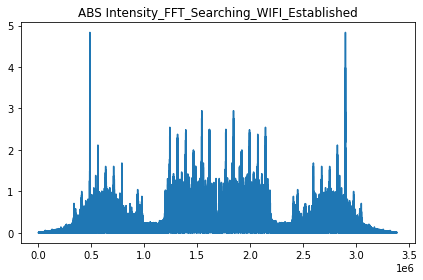

In [23]:
I_Data_Searching_WIFI_established_FFT = Sticker_Searching_without_connected_numpy[0:,0]
Q_Data_Searching_WIFI_established_FFT = Sticker_Searching_without_connected_numpy[0:,1]

X_Intensity_FFT_Searching_WIFI_established_ABS = abs(np.fft.fftshift(fft(I_Data_Searching_WIFI_established_FFT[:]-np.mean(I_Data_Searching_WIFI_established_FFT[:]))))
plt.plot(X_Intensity_FFT_Searching_WIFI_established_ABS )
plt.title("ABS Intensity_FFT_Searching_WIFI_Established")
plt.tight_layout()
plt.show()

/mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


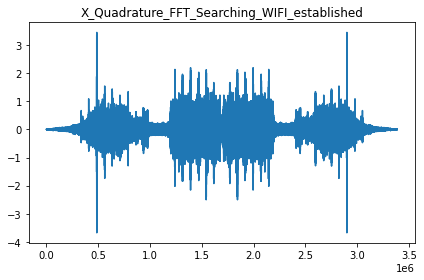

In [24]:
X_Quadrature_FFT_Searching_WIFI_established = np.fft.fftshift(fft(Q_Data_Searching_WIFI_established_FFT[:]-np.mean(Q_Data_Searching_WIFI_established_FFT[:])))
plt.plot(X_Quadrature_FFT_Searching_WIFI_established )
plt.title("X_Quadrature_FFT_Searching_WIFI_established")
plt.tight_layout()
plt.show()

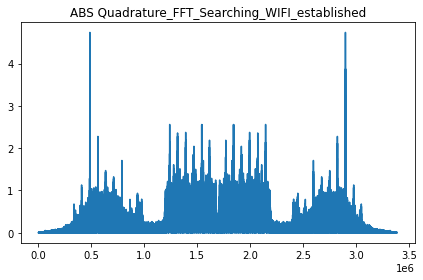

In [25]:
X_Quadrature_FFT_Searching_WIFI_established_ABS = abs(np.fft.fftshift(fft(Q_Data_Searching_WIFI_established_FFT[:]-np.mean(Q_Data_Searching_WIFI_established_FFT[:]))))
plt.plot(X_Quadrature_FFT_Searching_WIFI_established_ABS )
plt.title("ABS Quadrature_FFT_Searching_WIFI_established")
plt.tight_layout()
plt.show()

# Machine Learning

- Complex Number I+jQ 

In [26]:
I_Data_Searching_WIFI_established_FFT

array([ 3.465e-05,  1.447e-05,  1.361e-05, ...,  6.928e-05, -7.924e-05,
        1.083e-04])

In [27]:
Q_Data_Searching_WIFI_established_FFT

array([ 2.360e-06,  3.317e-05,  1.707e-05, ...,  5.822e-05, -5.833e-05,
       -3.658e-05])

In [28]:
complex_num_Searching_WIFI_Established = I_Data_Searching_WIFI_established_FFT + 1j*Q_Data_Searching_WIFI_established_FFT

In [29]:
complex_num_Searching_WIFI_Established

array([ 3.465e-05+2.360e-06j,  1.447e-05+3.317e-05j,
        1.361e-05+1.707e-05j, ...,  6.928e-05+5.822e-05j,
       -7.924e-05-5.833e-05j,  1.083e-04-3.658e-05j])

/mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


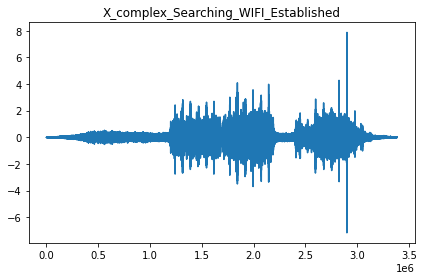

In [30]:
X_complex_Searching_WIFI_Established = (np.fft.fftshift(fft(complex_num_Searching_WIFI_Established[:]-np.mean(complex_num_Searching_WIFI_Established[:]))))
plt.plot(X_complex_Searching_WIFI_Established )
plt.title("X_complex_Searching_WIFI_Established")
plt.tight_layout()
plt.show()

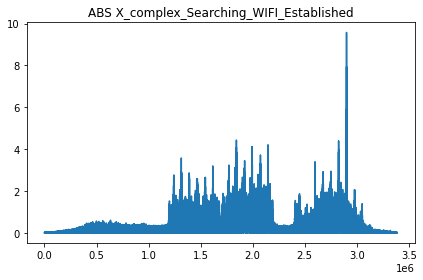

In [31]:
X_complex_Searching_WIFI_Established_ABS = abs(np.fft.fftshift(fft(complex_num_Searching_WIFI_Established[:]-np.mean(complex_num_Searching_WIFI_Established[:]))))
plt.plot(X_complex_Searching_WIFI_Established_ABS )
plt.title("ABS X_complex_Searching_WIFI_Established")
plt.tight_layout()
plt.show()

# Complex Signal I&Q  Dataset

In [32]:
complex_num_Searching_WIFI_Established = I_Data_Searching_WIFI_established_FFT + 1j*Q_Data_Searching_WIFI_established_FFT
complex_num_Connected = I_Data_Connected_FFT+1j*Q_Data_Connected_FFT
complex_num_Background = I_Data_BackgroundRFactivities_FFT+1j*Q_Data_BackgroundRFactivities_FFT
complex_num_Searching = I_Data_Searching_FFT+1j*Q_Data_Searching_FFT

In [33]:
X_complex_Connected = abs(np.fft.fftshift(fft(complex_num_Connected[:]-np.mean(complex_num_Connected[:]))))
X_complex_Searching = abs(np.fft.fftshift(fft(complex_num_Searching[:]-np.mean(complex_num_Searching[:]))))
X_complex_Background = abs(np.fft.fftshift(fft(complex_num_Background[:]-np.mean(complex_num_Background[:]))))
X_complex_Searching_WIFI_Established = abs(np.fft.fftshift(fft(complex_num_Searching_WIFI_Established[:]-np.mean(complex_num_Searching_WIFI_Established[:]))))

In [34]:
print("Shape of one mode : "+ str(X_complex_Background.shape))

Shape of one mode : (3387000,)


# Reshaping


In [35]:
Size_of_Input_Feature = 120
size = X_complex_Background.shape[0]
Divided = int(size / Size_of_Input_Feature)


In [36]:
X_complex_Connected= X_complex_Connected.reshape(Divided,Size_of_Input_Feature)
X_complex_Searching= X_complex_Searching.reshape(Divided,Size_of_Input_Feature)
X_complex_Background= X_complex_Background.reshape(Divided,Size_of_Input_Feature)
X_complex_Searching_WIFI_Established= X_complex_Searching_WIFI_Established.reshape(Divided,Size_of_Input_Feature)

In [37]:
print("Shape of one mode after reshaping : "+ str(X_complex_Background.shape))

Shape of one mode after reshaping : (28225, 120)


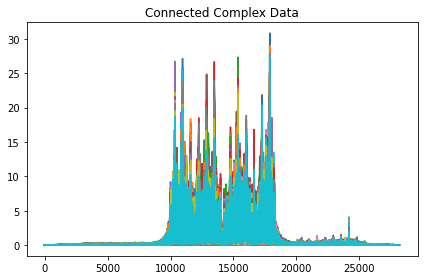

In [38]:
plt.plot(X_complex_Connected[0:])
plt.title("Connected Complex Data")
plt.tight_layout()
plt.show()

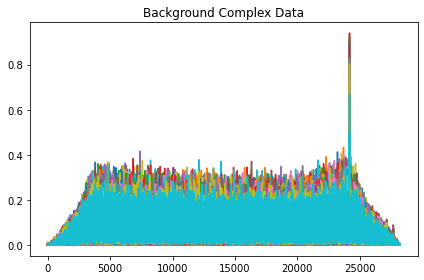

In [39]:
plt.plot(X_complex_Background[0:])
plt.title("Background Complex Data")
plt.tight_layout()
plt.show()

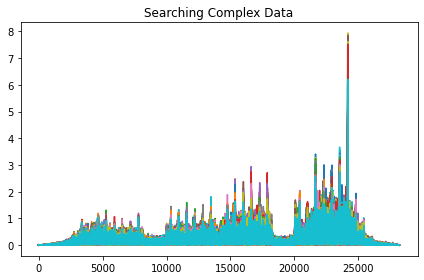

In [40]:
plt.plot(X_complex_Searching[0:])
plt.title("Searching Complex Data")
plt.tight_layout()
plt.show()

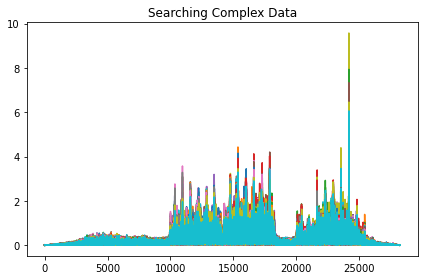

In [41]:
plt.plot(X_complex_Searching_WIFI_Established[0:])
plt.title("Searching Complex Data")
plt.tight_layout()
plt.show()

# Labelling

In [42]:
from sklearn.preprocessing import OneHotEncoder

Label =[['BackgroundRFactivities'],['Connected'],['Searching'],['Searching_WIFI_Establised']]

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

enc = enc.fit(Label)

Labelled = enc.transform(Label)

Labelled

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [43]:
np.random.seed(2016)

Complex_backgroundRFactivites_concatenate = np.tile(Labelled[0][np.newaxis,:],(X_complex_Background.shape[0],1))
Complex_BackgroundRFactivites_dataset=np.concatenate((X_complex_Background,Complex_backgroundRFactivites_concatenate),axis=1)
print("Connected dataset shape : " + str(Complex_BackgroundRFactivites_dataset.shape))

Complex_connected_concatenate = np.tile(Labelled[1][np.newaxis,:],(X_complex_Connected.shape[0],1))
Complex_connected_dataset=np.concatenate((X_complex_Connected,Complex_connected_concatenate),axis=1)
print("Connected dataset shape : " + str(Complex_connected_dataset.shape))

Complex_searching_concatenate = np.tile(Labelled[2][np.newaxis,:],(X_complex_Searching.shape[0],1))
Complex_searching_dataset=np.concatenate((X_complex_Searching,Complex_searching_concatenate),axis=1)
print("Connected dataset shape : " + str(Complex_searching_dataset.shape))

Complex_searching_wifi_established_concatenate = np.tile(Labelled[3][np.newaxis,:],(X_complex_Searching_WIFI_Established.shape[0],1))
Complex_searching_wifi_established_dataset=np.concatenate((X_complex_Searching_WIFI_Established,Complex_searching_wifi_established_concatenate),axis=1)
print("Connected dataset shape : " + str(Complex_searching_wifi_established_dataset.shape))

print('\n')
print(Complex_BackgroundRFactivites_dataset[0:5])
print('\n')
print(Complex_connected_dataset[0:5])
print('\n')
print(Complex_searching_dataset[0:5])
print('\n')
print(Complex_searching_wifi_established_dataset[0:5])

Connected dataset shape : (28225, 124)
Connected dataset shape : (28225, 124)
Connected dataset shape : (28225, 124)
Connected dataset shape : (28225, 124)


[[2.58920557e-03 3.22754605e-03 9.89268852e-04 1.32324269e-03
  9.69384253e-04 3.95236613e-03 2.81250550e-03 2.72554465e-03
  4.25926006e-03 4.84186763e-03 3.86887787e-03 1.97930306e-03
  3.19811317e-03 1.30936097e-03 4.01883659e-03 2.36173633e-03
  5.06350689e-03 2.55314818e-03 4.74277805e-03 9.40770044e-04
  8.45507605e-04 3.84017635e-05 1.51794247e-03 2.46511547e-03
  8.39922478e-04 6.14870317e-03 5.92004495e-03 2.77730467e-03
  2.05862074e-03 1.54166778e-03 1.59451717e-03 2.01561578e-03
  2.93543829e-03 1.32020333e-03 3.55545595e-03 1.54434998e-03
  2.73337706e-03 1.01073995e-03 3.41238747e-03 2.88974373e-03
  3.34487011e-03 1.87821623e-03 2.39447069e-03 2.40910928e-03
  3.17484756e-03 8.75537299e-03 1.84804265e-03 2.13852250e-03
  6.28171763e-03 9.33859631e-03 1.91727354e-03 1.72882674e-03
  2.41189159e-03 1.45942054e-03 3.83

In [44]:
import copy
stacked_data=np.vstack((Complex_BackgroundRFactivites_dataset,Complex_connected_dataset,Complex_searching_dataset,Complex_searching_wifi_established_dataset))
Dataset_Label_shuffled = copy.copy(stacked_data)
np.random.shuffle(Dataset_Label_shuffled)


In [45]:
length_of_X_train = int(0.7*Dataset_Label_shuffled.shape[0]) #2800
length_of_X_validation = (int(0.2*Dataset_Label_shuffled.shape[0]))+length_of_X_train #800 #3600
print(length_of_X_validation)

101610


In [46]:
Train_Dataset = Dataset_Label_shuffled[0:length_of_X_train,0:Size_of_Input_Feature]
print(Train_Dataset.shape)
Y_Train_Dataset = Dataset_Label_shuffled[0:length_of_X_train,Size_of_Input_Feature:]
print(Y_Train_Dataset)

(79030, 120)
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


In [47]:
Validation_Dataset = Dataset_Label_shuffled[length_of_X_train:length_of_X_validation,0:Size_of_Input_Feature]
Y_Validation_Dataset = Dataset_Label_shuffled[length_of_X_train:length_of_X_validation,Size_of_Input_Feature:]
print(Validation_Dataset.shape)

(22580, 120)


In [48]:
#Train_Dataset=Train_Dataset.reshape(length_of_X_train,Size_of_Input_Feature,1)
#Validation_Dataset=Validation_Dataset.reshape(800,Size_of_Input_Feature,1)
#print(Validation_Dataset.shape)

In [49]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=6)

model = Sequential()
model.add(Dense(128, input_dim=120, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [50]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf


In [51]:
history = model.fit(Train_Dataset, Y_Train_Dataset, epochs=4000,validation_data=(Validation_Dataset, Y_Validation_Dataset), batch_size=100,
                     callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')])

Epoch 1/4000
791/791 [==============================] - 1s 920us/step - loss: 1.0978 - accuracy: 0.4890 - val_loss: 1.0871 - val_accuracy: 0.4894
Epoch 2/4000
791/791 [==============================] - 1s 815us/step - loss: 1.0224 - accuracy: 0.5397 - val_loss: 1.0135 - val_accuracy: 0.5468
Epoch 3/4000
791/791 [==============================] - 1s 767us/step - loss: 0.9966 - accuracy: 0.5532 - val_loss: 1.0151 - val_accuracy: 0.5383
Epoch 4/4000
791/791 [==============================] - 1s 807us/step - loss: 0.9751 - accuracy: 0.5676 - val_loss: 0.9810 - val_accuracy: 0.5680
Epoch 5/4000
791/791 [==============================] - 1s 819us/step - loss: 0.9567 - accuracy: 0.5784 - val_loss: 0.9745 - val_accuracy: 0.5728
Epoch 6/4000
791/791 [==============================] - 1s 809us/step - loss: 0.9426 - accuracy: 0.5854 - val_loss: 1.0081 - val_accuracy: 0.5512
Epoch 7/4000
791/791 [==============================] - 1s 824us/step - loss: 0.9310 - accuracy: 0.5921 - val_loss: 0.9636 -

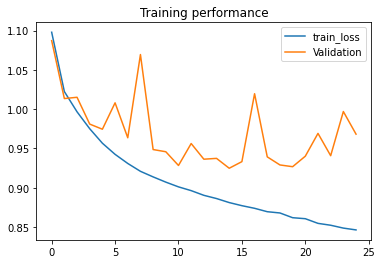

In [52]:
plt.figure()
plt.title('Training performance')
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.show()

In [53]:
_, accuracy_validation = model.evaluate(Validation_Dataset, Y_Validation_Dataset)
print('Accuracy_validation: %.2f' % (accuracy_validation*100))



706/706 [==============================] - 0s 460us/step - loss: 0.9682 - accuracy: 0.5814
Accuracy_validation: 58.14


In [54]:
model.save("{Model FFT} Fifth sticker Trained")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: {Model FFT} Fifth sticker Trained/assets


# Using First Model as Trained Model 

In [55]:
from tensorflow import keras
load_first_sticker_model = keras.models.load_model("../../Testing on RF spectrum/{Model FFT} First sticker Trained")
_,accuracy=load_first_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

706/706 [==============================] - 0s 463us/step - loss: 43.4613 - accuracy: 0.3268
32.68378973007202


# Using Third Model as Trained Model

In [56]:
from tensorflow import keras
load_third_sticker_model = keras.models.load_model("../../Testing on RF spectrum/{Model FFT} Third sticker Trained")
_,accuracy=load_third_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

706/706 [==============================] - 0s 451us/step - loss: 1.7696 - accuracy: 0.4604
46.036314964294434


# Using Fourth Model as Trained Model

In [57]:
from tensorflow import keras
load_fourth_sticker_model = keras.models.load_model("../../Testing on RF spectrum/{Model FFT} Fourth sticker Trained")
_,accuracy=load_fourth_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

706/706 [==============================] - 0s 434us/step - loss: 1.2617 - accuracy: 0.4760
47.59964644908905


# Using Fifth Model as Trained Model 

In [58]:
from tensorflow import keras
load_Fifth_sticker_model = keras.models.load_model("../../Testing on RF spectrum/{Model FFT} Fifth sticker Trained")
_,accuracy=load_Fifth_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

706/706 [==============================] - 0s 451us/step - loss: 0.9634 - accuracy: 0.5895
58.95482897758484
